Посмотрим одноразмерные ковариационные функции (для которых равномерная выборка одномерна)

Попробуем апрокссимировать гауссовские процессы на основе данных ковариационных функций с помощью гауссовских процессов на основе ядер: exponential , Matern32 , Matern52 , periodic_matern32

In [2]:
import numpy as np

function_names = ['rosenbrock', 'michalewicz', 'ackley1', 'gsobol', 'michalewicz5', 'sqmichalewicz5', 'Sinusoidal', 'Gramacy']

def functionDoESpecial(X, functionName):
    x = np.array(X, copy=True)

    sqr = lambda x: x**2


    if functionName.lower() ==  'rosenbrock':
        functionName = 'rosenbrock'

        c = 2.048
        x = c * (2 * x - 1)
        y = np.sum((1 - x[:, :-1])**2 + \
                   100 * (x[:, 1:] - x[:, :-1]**2)**2, axis=1)


    elif functionName.lower() == 'michalewicz':
        functionName = 'michalewicz';

        # rescale to 0<x<np.pi
        x = np.pi * x
        numberDimensions = x.shape[1]

        y = 0
        for i in range(numberDimensions):
            y = y + np.sin(x[:, i]) * np.sin(x[:, i]**2 / np.pi)


    elif functionName.lower() == 'ackley1':
        functionName = 'ackley1'

        x = 32.768 * (2 * x - 1)
        numberDimensions = x.shape[1]
        n = numberDimensions
        a = 20
        b = 0.2
        c = 2 * np.pi
        s1 = 0
        s2 = 0
        for i in range(numberDimensions):
            s1 = s1 + x[:, i]**2
            s2 = s2 + np.cos(c * x[:, i])

        y = -a * np.exp(-b * np.sqrt(1.0 / n * s1)) + a + np.exp(1)

    elif functionName.lower() == 'gsobol':
        functionName = 'gSobol'

        # x in [0,1]
        numberDimensions = x.shape[1]
        a = [4.5, 4.5, 1, 0, 1, 9, 0,9]
        y = 1
        for i in range(numberDimensions):
            y = y * (np.abs(4 * x[:, i] - 2) + a[i]) / (1 + a[i])

    elif functionName.lower() == 'michalewicz5':
        functionName = 'michalewicz5'

        # rescale to 0<x<np.pi
        x = np.pi * x
        numberDimensions = x.shape[1]

        y = 0
        for i in range(numberDimensions):
            y = y + np.sin(x[:, i]) * np.sin(x[:, i]**2 / np.pi)

    elif functionName.lower() == 'sqmichalewicz5':
        functionName = 'sqMichalewicz5'

        # rescale to 0<x<np.pi
        x = np.pi * x
        numberDimensions = x.shape[1]

        y = 0
        for i in range(numberDimensions):
            y = y + np.sin(x[:, i]) * np.sin(x[:, i]**2 / np.pi)**2

    elif functionName.lower() == 'rosenbrock5':
        functionName = 'rosenbrock5'

        c = 2.048
        x = c * (2 * x - 1)
        y = np.sum((1 - x[:, :-1])**2 + \
                   100 * (x[:, 1:] - x[:, :-1]**2)**2, axis=1)
        
    elif functionName.lower() == 'sinusoidal':
        functionName = 'sinusoidal'

        y=np.ravel(np.cos(x[:,0]) + np.sin(3*x[:,0]))
        
    elif functionName.lower() == 'gramacy':
        functionName = 'gramacy'
        y=np.ravel(np.sin(10*np.pi*x) / (2*x) + (x-1)**4)

    return y

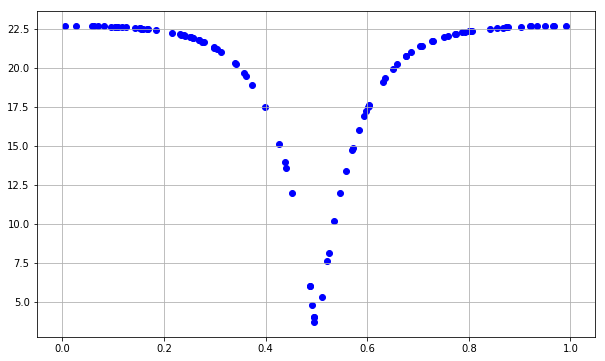

In [3]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt
%matplotlib inline

f_name = 'ackley1'
#Генерирую гауссовский процесс на основе данной ковариационной функции
a=[]
b=[]
for i in range (100):
    X = np.random.uniform (0,1,(1,1))
    y = functionDoESpecial (X, f_name)
    a=np.append (a,X)
    b=np.append (b,y)

    
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=[10, 6])
plt.scatter(a, b, color = 'blue', marker='o', label="")
ax.grid(True)
plt.show()

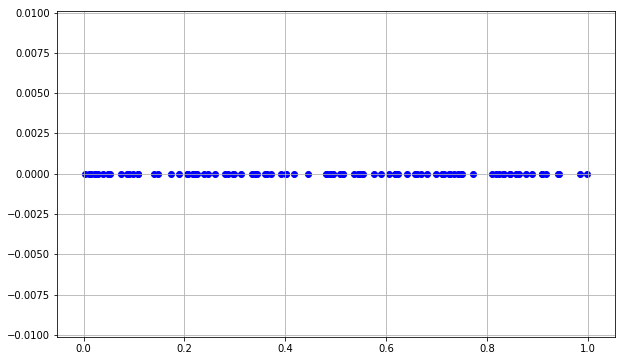

In [4]:
f_name = 'rosenbrock'
#Генерирую гауссовский процесс на основе данной ковариационной функции
a=[]
b=[]
for i in range (100):
    X = np.random.uniform (0,1,(1,1))
    y = functionDoESpecial (X, f_name)
    a=np.append (a,X)
    b=np.append (b,y)

    
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=[10, 6])
plt.scatter(a, b, color = 'blue', marker='o', label="")
ax.grid(True)
plt.show()

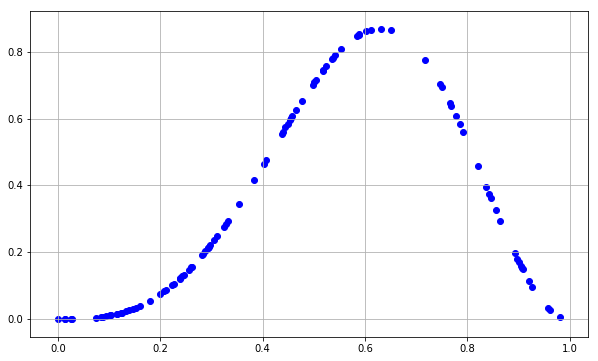

In [5]:
f_name = 'michalewicz'
#Генерирую гауссовский процесс на основе данной ковариационной функции
a=[]
b=[]
for i in range (100):
    X = np.random.uniform (0,1,(1,1))
    y = functionDoESpecial (X, f_name)
    a=np.append (a,X)
    b=np.append (b,y)

    
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=[10, 6])
plt.scatter(a, b, color = 'blue', marker='o', label="")
ax.grid(True)
plt.show()

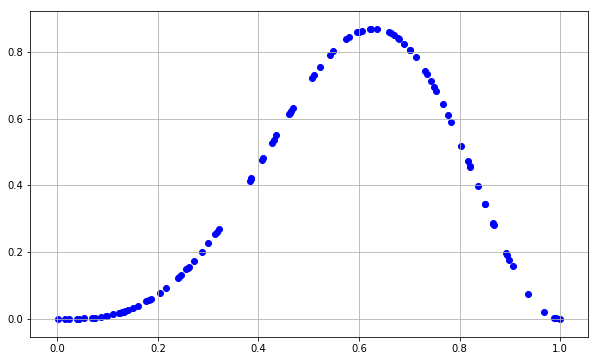

In [7]:
f_name = 'michalewicz5'
#Генерирую гауссовский процесс на основе данной ковариационной функции
a=[]
b=[]
for i in range (100):
    X = np.random.uniform (0,1,(1,1))
    y = functionDoESpecial (X, f_name)
    a=np.append (a,X)
    b=np.append (b,y)

    
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=[10, 6])
plt.scatter(a, b, color = 'blue', marker='o', label="")
ax.grid(True)
plt.show()

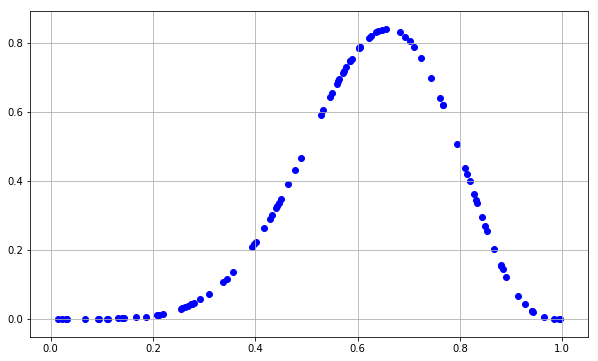

In [8]:
f_name = 'sqmichalewicz5'
#Генерирую гауссовский процесс на основе данной ковариационной функции
a=[]
b=[]
for i in range (100):
    X = np.random.uniform (0,1,(1,1))
    y = functionDoESpecial (X, f_name)
    a=np.append (a,X)
    b=np.append (b,y)

    
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=[10, 6])
plt.scatter(a, b, color = 'blue', marker='o', label="")
ax.grid(True)
plt.show()

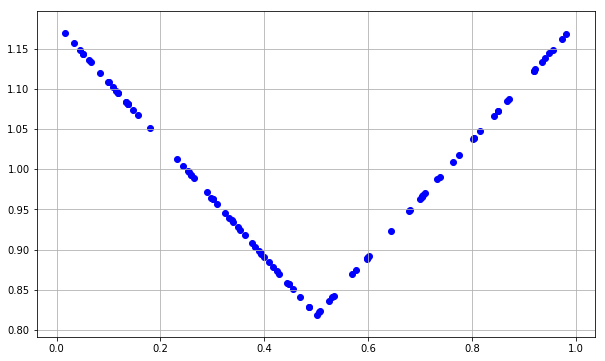

In [9]:
f_name = 'gsobol'
#Генерирую гауссовский процесс на основе данной ковариационной функции
a=[]
b=[]
for i in range (100):
    X = np.random.uniform (0,1,(1,1))
    y = functionDoESpecial (X, f_name)
    a=np.append (a,X)
    b=np.append (b,y)

    
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=[10, 6])
plt.scatter(a, b, color = 'blue', marker='o', label="")
ax.grid(True)
plt.show()

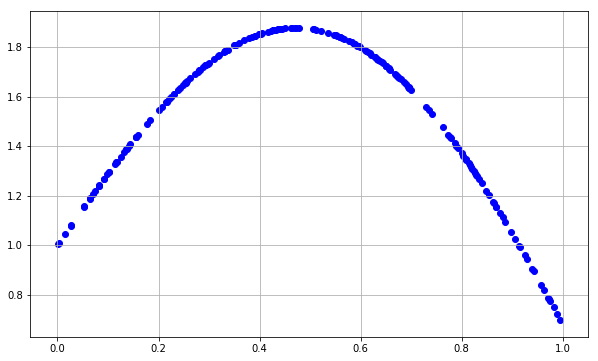

In [10]:
f_name = 'sinusoidal'
#Генерирую гауссовский процесс на основе данной ковариационной функции
a=[]
b=[]
for i in range (200):
    x = np.random.uniform (0,1,(1,1))
    y = functionDoESpecial (x, f_name)
    a=np.append (a,x)
    b=np.append (b,y)

    
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=[10, 6])
plt.scatter(a, b, color = 'blue', marker='o', label="")
ax.grid(True)
plt.show()

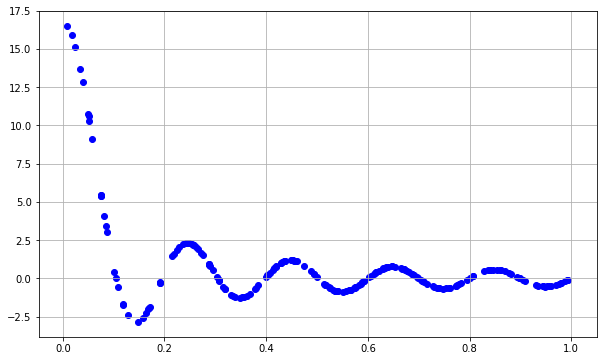

In [11]:
f_name = 'gramacy'
#Генерирую гауссовский процесс на основе данной ковариационной функции
a=[]
b=[]
for i in range (200):
    x = np.random.uniform (0,1,(1,1))
    y = functionDoESpecial (x, f_name)
    a=np.append (a,x)
    b=np.append (b,y)

    
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=[10, 6])
plt.scatter(a, b, color = 'blue', marker='o', label="")
ax.grid(True)
plt.show()

Проведём тесты c экспоненциальным ядром

In [12]:
kern_name = [GPy.kern.Exponential, GPy.kern.Matern32, GPy.kern.Matern52, GPy.kern.PeriodicMatern32] #ядра гауссовских процессов
function_names = ['michalewicz', 'ackley1', 'gsobol', 'michalewicz5', 'sqmichalewicz5', 'Sinusoidal', 'Gramacy']


def test (f_name, k1, i1, m1, ker_name):
#k1 - количество тестов
#i1 - количество точек в обучающей выборке
#m1 - количество точек для подсчёта MAE, MSE
    MAE_exp = []
    MSE_exp = []
    for k in range (k1):
        a=[]
        b=[]
        for i in range (i1):
            X = np.random.uniform (0,1,(1,1))
            y = functionDoESpecial (X, f_name)
            a=np.append (a,X)
            b=np.append (b,y)

        gp_x = a.reshape(a.shape[0], 1)
        gp_y = b.reshape(b.shape[0], 1)
        kern_1 = ker_name(1)
        model = GPy.models.GPRegression(gp_x, gp_y, kern_1)
        model.optimize()
        a=[]
        b=[]
        for i in range (m1):
            X = np.random.uniform (0,1,(1,1))
            y = functionDoESpecial (X, f_name)
            a=np.append (a,X)
            b=np.append (b,y)

        gp_xx = a.reshape(a.shape[0], 1)
        gp_yy=model.predict(gp_xx)
        c=gp_yy[0]
        MAE_exp=np.append(MAE_exp, MAE(b,c))
        MSE_exp=np.append(MSE_exp, MSE(b,c))
    return MAE_exp, MSE_exp

In [65]:
d1 = pd.DataFrame(columns=['Name','MSE_exp', 'MSE_mt32', 'MSE_mt52',  'MSE_pmt32'])
d2 = pd.DataFrame(columns=['Name','MAE_exp', 'MAE_mt32', 'MAE_mt52',  'MAE_pmt32'])

i=0
for f_name in function_names:
    MSE_error=[f_name]
    MAE_error=[f_name]
    for ker_name in kern_name:
        text = test (f_name, 100, 30,60, ker_name)
        MAE_1 = text[0]
        MSE_1 = text[1]
        MAE_=round(np.mean (MAE_1),6)
        MSE_=round(np.mean (MSE_1),6)
        MSE_error = np.append (MSE_error,MSE_)
        MAE_error = np.append (MAE_error,MAE_)
    d1.loc[i] = MSE_error
    d2.loc[i] = MAE_error
    i=i+1

 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\util\linalg.py:63: RuntimeWarning:invalid value encountered in less_equal
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:overflow encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:invalid value encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\util\linalg.py:63: RuntimeWarning:invalid value encountered in less_equal
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\periodic.py:204: RuntimeWarning:overflow encountered in square
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\util\linalg.py:63: RuntimeWarning:invalid value encountered in less_equal
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\util\linalg.py:63: RuntimeWarning:invalid value encountered in less_equal
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\util\linalg.py:63: RuntimeWarning:invalid value encountered in less_equal
 C:\Users\moroz\A

In [75]:
d1 = pd.DataFrame(columns=['Name','MSE_exp', 'MSE_mt32', 'MSE_mt52',  'MSE_pmt32'])
d2 = pd.DataFrame(columns=['Name','MAE_exp', 'MAE_mt32', 'MAE_mt52',  'MAE_pmt32'])


i=0
for k in range (5):
    for f_name in function_names:
        MSE_error=[f_name+str(k)]
        MAE_error=[f_name+str(k)]
        for ker_name in kern_name:
            text = test (f_name, 50+k*10 , 30,60, ker_name)
            MAE_1 = text[0]
            MSE_1 = text[1]
            MAE_=round(np.mean (MAE_1),6)
            MSE_=round(np.mean (MSE_1),6)
            MSE_error = np.append (MSE_error,MSE_)
            MAE_error = np.append (MAE_error,MAE_)
        d1.loc[i] = MSE_error
        d2.loc[i] = MAE_error
        i=i+1

 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\util\linalg.py:63: RuntimeWarning:invalid value encountered in less_equal
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:overflow encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:invalid value encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:overflow encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:invalid value encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\periodic.py:204: RuntimeWarning:overflow encountered in square
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\util\linalg.py:63: RuntimeWarning:invalid value encountered in less_equal
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\util\linalg.py:63: RuntimeWarning:invalid value encountered in less_equal
 C:\User

 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\periodic.py:212: RuntimeWarning:overflow encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\periodic.py:212: RuntimeWarning:invalid value encountered in add
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\util\linalg.py:63: RuntimeWarning:invalid value encountered in less_equal
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\periodic.py:192: RuntimeWarning:divide by zero encountered in true_divide
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\periodic.py:204: RuntimeWarning:overflow encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\periodic.py:204: RuntimeWarning:overflow encountered in square
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\periodic.py:212: RuntimeWarning:invalid value encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\util\linalg.py:63: RuntimeWarning:invalid value encountered in less_equal
 C:\Users\mo

 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\periodic.py:196: RuntimeWarning:overflow encountered in true_divide
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\periodic.py:40: RuntimeWarning:invalid value encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\periodic.py:40: RuntimeWarning:invalid value encountered in cos
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\util\linalg.py:63: RuntimeWarning:invalid value encountered in less_equal
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\periodic.py:212: RuntimeWarning:overflow encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\periodic.py:212: RuntimeWarning:overflow encountered in add
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\util\linalg.py:63: RuntimeWarning:invalid value encountered in less_equal
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\periodic.py:212: RuntimeWarning:overflow encountered in multiply
 C:\Users\moroz\Anacond

In [76]:
print (d2)

               Name   MAE_exp  MAE_mt32  MAE_mt52 MAE_pmt32
0      michalewicz0  0.006501  0.001236  0.000764  0.000123
1          ackley10  0.288824  1.644391  3.240002  3.708651
2           gsobol0  0.001978  0.000705  0.000995  0.006137
3     michalewicz50  0.008798  0.000832  0.001364  0.000105
4   sqmichalewicz50  0.007854   0.00133  0.000305  0.000243
5       Sinusoidal0  0.008674  0.000199   6.7e-05   1.2e-05
6          Gramacy0  0.472236  0.412868  0.466605  1.162625
7      michalewicz1  0.008331   0.00124  0.000745  0.000152
8          ackley11  0.311314  1.716602  3.415409  3.596633
9           gsobol1  0.002464  0.000761  0.001339  0.005906
10    michalewicz51  0.007707  0.000961  0.000391   9.2e-05
11  sqmichalewicz51  0.007408  0.001131  0.000589  0.000379
12      Sinusoidal1  0.009579  0.000414   7.6e-05   1.2e-05
13         Gramacy1  0.519845  0.471136  0.630258  1.055178
14     michalewicz2  0.006606  0.001365  0.000594  0.000106
15         ackley12  0.275537  1.745185 

Посмотрим на кривые Долана-Мора

По определению, по оси абцисс данных графиков откладывается величина p равная отношению ошибки рассматриваемого (i-го) аппроксиматора к минимальной ошибке среди всех методов на конкретной задаче.
По оси ординат откладывается доля задач, на которых ошибка метода, нормированная на минимальное значение ошибки среди всех методов, не превосходит величины p.

In [77]:
Names = ['MAE_exp', 'MAE_mt32', 'MAE_mt52', 'MAE_pmt32']

In [78]:
print(d2)

               Name   MAE_exp  MAE_mt32  MAE_mt52 MAE_pmt32
0      michalewicz0  0.006501  0.001236  0.000764  0.000123
1          ackley10  0.288824  1.644391  3.240002  3.708651
2           gsobol0  0.001978  0.000705  0.000995  0.006137
3     michalewicz50  0.008798  0.000832  0.001364  0.000105
4   sqmichalewicz50  0.007854   0.00133  0.000305  0.000243
5       Sinusoidal0  0.008674  0.000199   6.7e-05   1.2e-05
6          Gramacy0  0.472236  0.412868  0.466605  1.162625
7      michalewicz1  0.008331   0.00124  0.000745  0.000152
8          ackley11  0.311314  1.716602  3.415409  3.596633
9           gsobol1  0.002464  0.000761  0.001339  0.005906
10    michalewicz51  0.007707  0.000961  0.000391   9.2e-05
11  sqmichalewicz51  0.007408  0.001131  0.000589  0.000379
12      Sinusoidal1  0.009579  0.000414   7.6e-05   1.2e-05
13         Gramacy1  0.519845  0.471136  0.630258  1.055178
14     michalewicz2  0.006606  0.001365  0.000594  0.000106
15         ackley12  0.275537  1.745185 

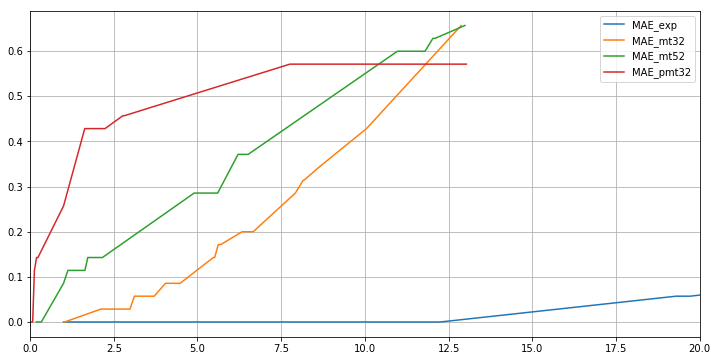

In [90]:
import pylab
plt.figure(figsize=(12, 6))

for name in Names:
    x=[]
    for i in range(35):
        x=np.append(x,float(d2[name][i]) / float(d2.iloc[i].min()))
    y=[]
    x=sorted(x)
    for ab in x:
        m=0
        for i in range(35):
            if (float(d2[name][i]) / float((d2.min()).min())) < ab:
                m=m+1
        y=np.append (y,m)
    y=y/35
    plt.plot (x,y, label = name)
    plt.legend()
    print ('')
plt.xlim(0,20)
plt.grid()
pylab.savefig('foo.png')